In [1]:
import numpy as np
import pandas as pd

from datetime import datetime
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
# from mlxtend.regressor import StackingCVRegressor
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

sns.set()

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
print(train.shape)
train.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# EDA

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
num_features = [x for x in train.columns if train.dtypes[x] != 'object']
num_features.remove('SalePrice')
num_features.remove('Id')

In [7]:
cate_features = [x for x in train.columns if train.dtypes[x] == 'object']

In [8]:
print(len(num_features))
print(len(cate_features))

36
43


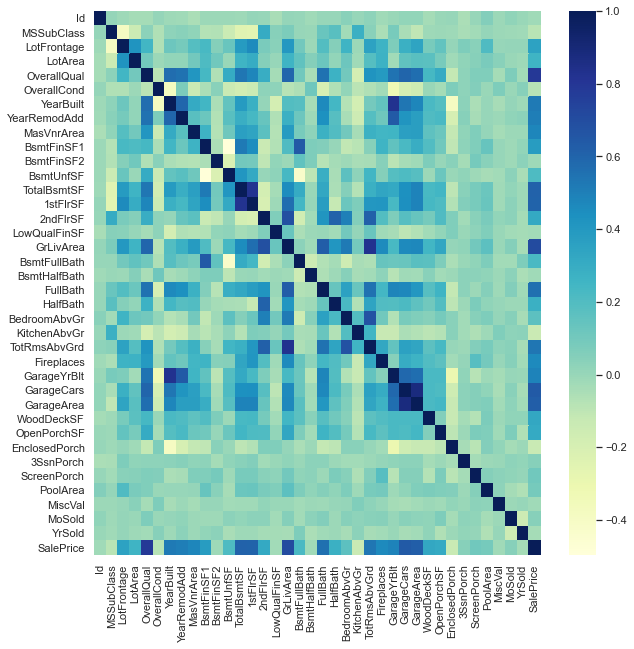

In [9]:
plt.figure(figsize=(10, 10))
sns.heatmap(train.corr(), cmap="YlGnBu")

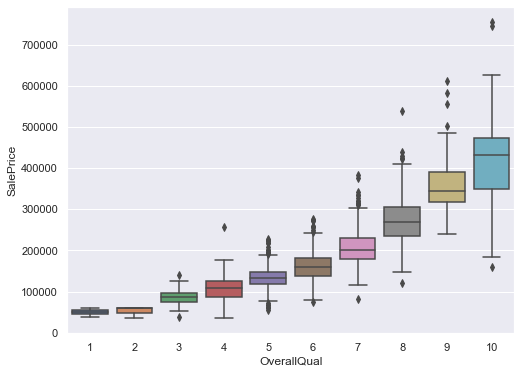

In [10]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=train)

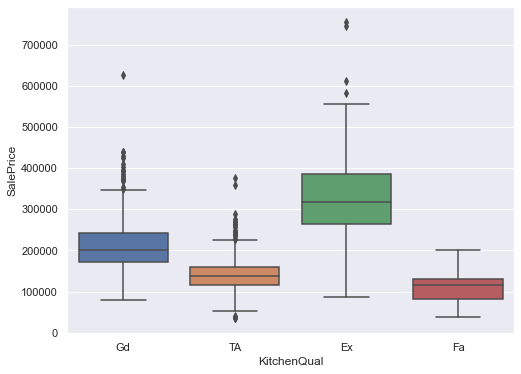

In [11]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='KitchenQual', y='SalePrice', data=train)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text major ticklabel objects>)

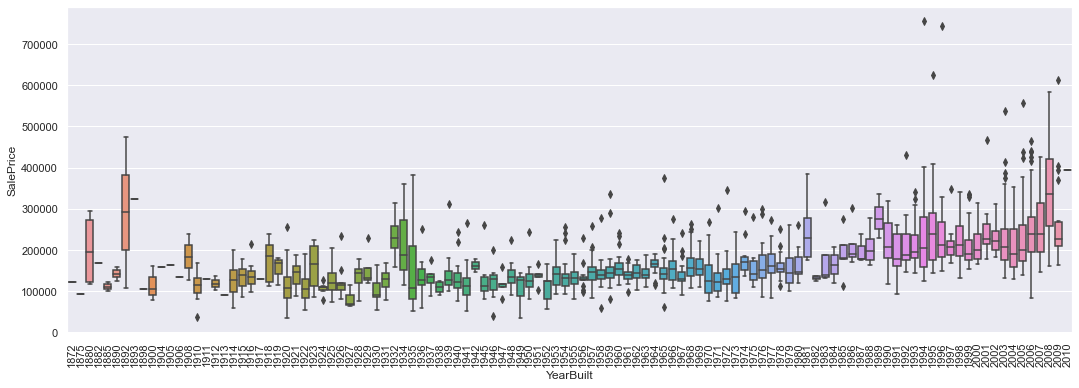

In [12]:
plt.figure(figsize=(18, 6))
sns.boxplot(x='YearBuilt', y='SalePrice', data=train)
plt.xticks(rotation=90)

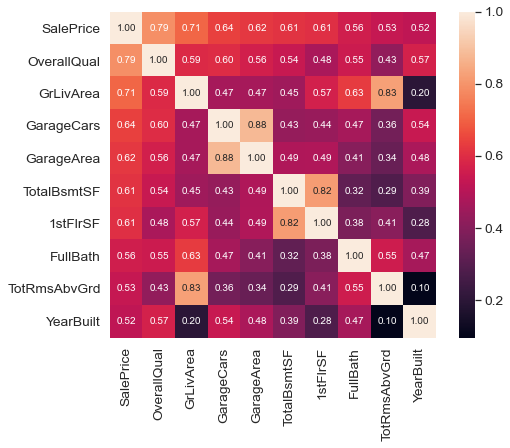

In [13]:
k = 10
cols = train.corr().nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [14]:
# cols = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'SalePrice']
# sns.pairplot(train[cols], size = 2.5)
# plt.show();

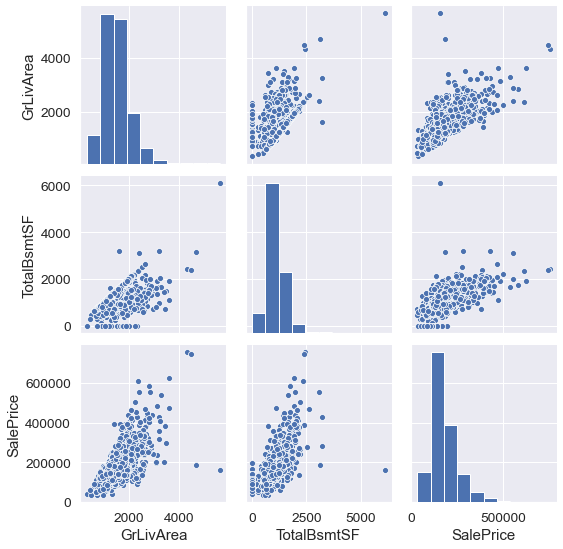

In [15]:
cols = ['GrLivArea', 'TotalBsmtSF', 'SalePrice']
sns.pairplot(train[cols], size = 2.5)
plt.show()

In [16]:
train.shape[0]

1460

In [17]:
missing = train.isna().sum()
missing_df = pd.DataFrame(missing[missing > 0].sort_values(ascending=False))
missing_df.columns = ['missing']
missing_df['percent'] = round(missing_df['missing'] / train.shape[0], 3)

missing_df

,missing,percent
PoolQC,1453,0.995
MiscFeature,1406,0.963
Alley,1369,0.938
Fence,1179,0.808
FireplaceQu,690,0.473
LotFrontage,259,0.177
GarageYrBlt,81,0.055
GarageType,81,0.055
GarageFinish,81,0.055
GarageQual,81,0.055


In [18]:
train = train.drop((missing_df[missing_df['missing'] > 1]).index,1)
train = train.drop(train.loc[train['Electrical'].isnull()].index)
train.isnull().sum().max()

0

In [20]:
outliers_index = [1299, 524, 332, 30, 88, 462, 631, 1322]
train = train.drop(train.index[outliers_index])

In [21]:
train.sort_values(by = 'GrLivArea', ascending = False)[:2]
# train = train.drop(train[train['Id'] == 1299].index)
# train = train.drop(train[train['Id'] == 524].index)

In [23]:
train.sort_values(by = 'TotalBsmtSF', ascending = False)[:1]
# train = train.drop(train[train['Id'] == 332].index)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
496,497,20,RL,12692,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,291,0,0,0,0,5,2007,WD,Normal,430000


In [25]:
train['SalePrice'].describe()

count      1448.000000
mean     181044.933011
std       79441.556235
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

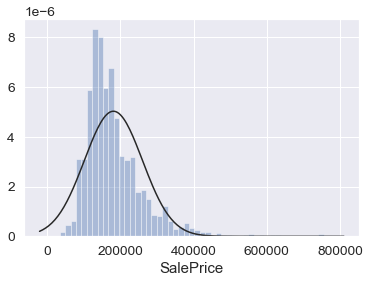

In [26]:
y = train['SalePrice']

plt.figure(2)
sns.distplot(y, kde=False, fit=stats.norm)

In [22]:
train['SalePrice'].skew()

1.8792709732964028

In [28]:
train['SalePrice'] = np.log(train['SalePrice'])

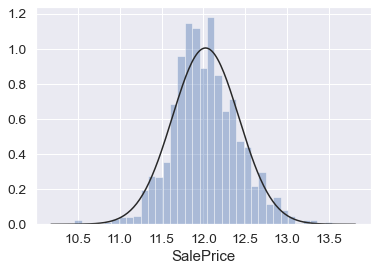

In [29]:
plt.figure(2)
sns.distplot(train['SalePrice'], kde=False, fit=stats.norm)

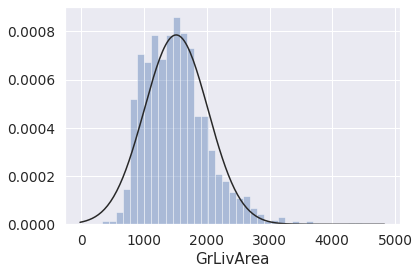

In [25]:
sns.distplot(train['GrLivArea'], kde=False, fit=stats.norm)

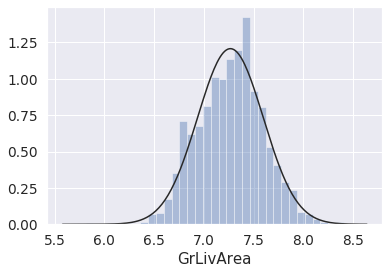

In [26]:
train['GrLivArea'] = np.log(train['GrLivArea'])
sns.distplot(train['GrLivArea'], kde=False, fit=stats.norm)

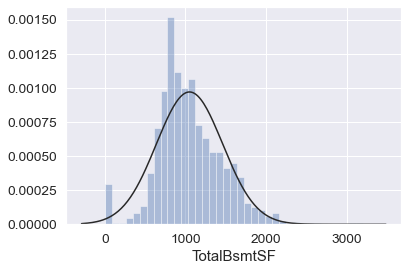

In [32]:
sns.distplot(train['TotalBsmtSF'], kde=False, fit=stats.norm)

In [34]:
train['HasBsmt'] = pd.Series(len(train['TotalBsmtSF']), index=train.index)
train['HasBsmt'] = 0 
train.loc[train['TotalBsmtSF']>0, 'HasBsmt'] = 1

train.loc[train['HasBsmt']==1,'TotalBsmtSF'] = np.log(train['TotalBsmtSF'])

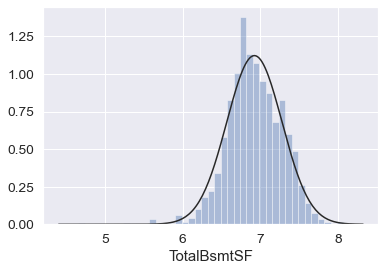

In [35]:
sns.distplot(train[train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=stats.norm, kde=False)

In [36]:
train = pd.get_dummies(train)

In [37]:
X = train.drop(['SalePrice', 'Id'], axis=1)
y = train['SalePrice']

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y)

In [39]:
import math
def root_mean_squared_log_error(y_valid, y_preds):
    """Calculate root mean squared error of log(y_true) and log(y_pred)"""
    if len(y_preds)!=len(y_valid): return 'error_mismatch'
    y_preds_new = [math.log(x) + 1 for x in y_preds]
    y_valid_new = [math.log(x) + 1 for x in y_valid]
    return mean_squared_error(y_valid_new, y_preds_new, squared=False)

In [40]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(random_state=0)

tree_model.fit(X_train, y_train)

tree_model.fit(X_train, y_train)

tree_preds = tree_model.predict(X_valid)

print('RMSLE:', root_mean_squared_log_error(y_valid, tree_preds))

RMSLE: 0.017395388315208177


In [35]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.02, random_state=0)

xgb_model.fit(X_train, y_train)

xgb_model.fit(X_train, y_train)

xgb_preds = xgb_model.predict(X_valid)

print('RMSLE:', root_mean_squared_log_error(y_valid, xgb_preds))

RMSLE: 0.009967811030719144


In [34]:
# from sklearn.model_selection import GridSearchCV

# params = {
#         'min_child_weight': [1, 5, 10],
#         'gamma': [0.5, 1, 1.5, 2, 5],
#         'subsample': [0.6, 0.8, 1.0],
#         'colsample_bytree': [0.6, 0.8, 1.0],
#         'max_depth': [3, 4, 5]
#         }

# grid = GridSearchCV(xgb_model, param_grid=params, n_jobs=-1, cv=5, verbose=3 )
# grid.fit(X, y)
# print('\n All results:')
# print(grid.cv_results_)
# print('\n Best estimator:')
# print(grid.best_estimator_)
# print('\n Best score:')
# print(grid.best_score_ * 2 - 1)
# print('\n Best parameters:')
# print(grid.best_params_)

In [35]:
"""Best estimator:
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0.5, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.02, max_delta_step=0, max_depth=5,
             min_child_weight=5, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
             tree_method='exact', validate_parameters=1, verbosity=None)

 Best score:
0.7695079120836845

 Best parameters:
{'colsample_bytree': 0.8, 'gamma': 0.5, 'max_depth': 5, 'min_child_weight': 5, 'subsample': 0.6}"""

"Best estimator:\nXGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,\n             colsample_bynode=1, colsample_bytree=0.8, gamma=0.5, gpu_id=-1,\n             importance_type='gain', interaction_constraints='',\n             learning_rate=0.02, max_delta_step=0, max_depth=5,\n             min_child_weight=5, missing=nan, monotone_constraints='()',\n             n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=0,\n             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,\n             tree_method='exact', validate_parameters=1, verbosity=None)\n\n Best score:\n0.7695079120836845\n\n Best parameters:\n{'colsample_bytree': 0.8, 'gamma': 0.5, 'max_depth': 5, 'min_child_weight': 5, 'subsample': 0.6}"

In [36]:
# from xgboost import XGBRegressor

# xgb_model = XGBRegressor(colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6)

# xgb_model.fit(X_train, y_train)

# xgb_model.fit(X_train, y_train)

# xgb_preds = xgb_model.predict(X_valid)

# print('RMSLE:', root_mean_squared_log_error(y_valid, xgb_preds))

In [42]:
test = pd.read_csv('data/test.csv')

In [43]:
test = test.drop('Id', axis=1)
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [44]:
test = test.drop((missing_df[missing_df['missing'] > 1]).index,1)

In [45]:
test['GrLivArea'] = np.log(test['GrLivArea'])
test['HasBsmt'] = pd.Series(len(test['TotalBsmtSF']), index=test.index)
test['HasBsmt'] = 0 
test.loc[test['TotalBsmtSF']>0, 'HasBsmt'] = 1

test.loc[test['HasBsmt']==1,'TotalBsmtSF'] = np.log(test['TotalBsmtSF'])
test = pd.get_dummies(test)

In [46]:
test

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20,11622,5,6,1961,1961,468.0,144.0,270.0,6.782192,...,0,0,0,1,0,0,0,0,1,0
1,20,14267,6,6,1958,1958,923.0,0.0,406.0,7.192182,...,0,0,0,1,0,0,0,0,1,0
2,60,13830,5,5,1997,1998,791.0,0.0,137.0,6.833032,...,0,0,0,1,0,0,0,0,1,0
3,60,9978,6,6,1998,1998,602.0,0.0,324.0,6.830874,...,0,0,0,1,0,0,0,0,1,0
4,120,5005,8,5,1992,1992,263.0,0.0,1017.0,7.154615,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,1936,4,7,1970,1970,0.0,0.0,546.0,6.302619,...,0,0,0,1,0,0,0,0,1,0
1455,160,1894,4,5,1970,1970,252.0,0.0,294.0,6.302619,...,0,0,0,1,1,0,0,0,0,0
1456,20,20000,5,7,1960,1996,1224.0,0.0,0.0,7.109879,...,0,0,0,1,1,0,0,0,0,0
1457,85,10441,5,5,1992,1992,337.0,0.0,575.0,6.815640,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
test = xgb_model.predict(X_valid)